In [1]:
import numpy as np
from matplotlib import pyplot as plt

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

from ase.build import bulk
from dftpy.functional.kedf.kernel import WTKernel

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [3]:
def min_delta_rho(x0, *args):
    rho_ks, ions = args
    KE = Functional(type='KEDF',name='WT', rho0=x0)
#     KE = Functional(type='KEDF', name='TFvW')
    
    ions.set_charges(4)
    grid = DirectGrid(lattice=ions.cell, nr=[len(rho_ks),len(rho_ks),len(rho_ks[0,0])])
    rho_ini = DirectField(grid=grid)
    rho_ini[:] = ions.get_ncharges()/ions.cell.volume
    PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
    evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
    optimization_options = {'econv' : 1e-5*ions.nat}
    opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
                       optimization_method = 'TN')
    rho = opt.optimize_rho(guess_rho=rho_ini)
    diff = 0.5 * (np.abs(rho - rho_ks)).integral()
    print('Results: ', x0, diff)
    
    return diff

In [4]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

# rho_ks = io.read_density('rho.xsf')
# inputfile ='Si.in'
# material = read(inputfile, format='espresso-in')
# ions = Ions.from_ase(material) 

In [12]:
rho_ks.integral() * 8*4/rho_ks.integral()

32.0

In [35]:
t = [1.8]
diff = []
rho0 = []
for i in t:
    print('NEW CYCLE')
    rho_ks = io.read_density('rho_'+str(i)+'.xsf')
    rho_ks *= 32/rho_ks.integral()
    inputfile ='Si_'+str(i)+'.in'
    material = read(inputfile, format='espresso-in')
    ions = Ions.from_ase(material)
    minn = minimize(min_delta_rho, 0.04, args = (rho_ks, ions), method='Powell', bounds=[[0.02,1]], options={'ftol' : 1e-3})
    diff.append(minn.fun)
    rho0.append(minn.x)

NEW CYCLE
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       4.068270E-01    
!WARN : pAp small than zero :iter =  2 -36161223.50500407
1       -2.873220061123E+01     -8.633556E+00   1.336659E+01    3       4       1.831066E+00    
2       -2.974812775685E+01     -1.015927E+00   1.260625E+00    10      1       3.568007E+00    
3       -2.983435320190E+01     -8.622545E-02   5.362458E-01    14      1       5.974272E+00    
4       -2.985592489612E+01     -2.157169E-02   8.725190E-02    18      1       8.874659E+00    
5       -2.985633170196E+01     -4.068058E-04   4.818916E-02    18      1       1.196166E+01    
6       -2.985657616437E+01     -2.444624E-04   4.152354E-02    17      1       1.478733E+01    
7       -2.985677555885E+01     -1.993945E-04   3.433140E-02    16      1       

1       -2.788456967077E+01     -7.785925E+00   8.754363E+00    3       2       1.282086E+00    
2       -2.871562085073E+01     -8.310512E-01   2.195066E+00    12      1       3.257017E+00    
3       -2.882808532274E+01     -1.124645E-01   1.037102E+00    12      1       5.198700E+00    
4       -2.885540499999E+01     -2.731968E-02   6.023263E-01    13      1       7.204512E+00    
5       -2.886591050352E+01     -1.050550E-02   3.160772E-01    13      1       9.462290E+00    
6       -2.896653647102E+01     -1.006260E-01   1.318585E-01    18      3       1.260539E+01    
7       -2.897127490731E+01     -4.738436E-03   2.609993E-02    14      1       1.477335E+01    
8       -2.897142460077E+01     -1.496935E-04   1.835106E-02    12      1       1.659394E+01    
9       -2.897779135815E+01     -6.366757E-03   5.294808E-03    16      4       1.940194E+01    
10      -2.897782058711E+01     -2.922896E-05   3.126435E-03    17      1       2.207828E+01    
11      -2.897783622393E+01   

14      -2.959625225782E+01     -1.075430E-04   2.114868E-02    13      1       3.454444E+01    
15      -2.959635482506E+01     -1.025672E-04   1.935937E-02    16      1       3.710034E+01    
16      -2.959645305029E+01     -9.822523E-05   1.940777E-02    14      1       3.938469E+01    
17      -2.959654740923E+01     -9.435894E-05   1.793847E-02    14      1       4.158099E+01    
18      -2.959663831645E+01     -9.090722E-05   1.797013E-02    14      1       4.394706E+01    
19      -2.959672609740E+01     -8.778096E-05   1.682446E-02    17      1       4.649968E+01    
20      -2.959681105821E+01     -8.496080E-05   1.684634E-02    22      1       4.985858E+01    
21      -2.959689344534E+01     -8.238713E-05   1.584816E-02    12      1       5.188033E+01    
22      -2.959697347877E+01     -8.003343E-05   1.586402E-02    13      1       5.407119E+01    
23      -2.959705134054E+01     -7.786177E-05   1.506142E-02    13      1       5.611825E+01    
24      -2.959712720637E+01   

5       -2.977708713104E+01     -3.988387E-04   4.723585E-02    18      1       1.103955E+01    
6       -2.977732659001E+01     -2.394590E-04   4.061782E-02    17      1       1.369500E+01    
7       -2.977752165376E+01     -1.950637E-04   3.356769E-02    16      1       1.608641E+01    
8       -2.977769294203E+01     -1.712883E-04   3.224885E-02    18      1       1.879339E+01    
9       -2.977784803288E+01     -1.550909E-04   2.799093E-02    14      1       2.094668E+01    
10      -2.977799093504E+01     -1.429022E-04   2.768751E-02    15      1       2.331307E+01    
11      -2.977812413806E+01     -1.332030E-04   2.451655E-02    18      1       2.600773E+01    
12      -2.977824935947E+01     -1.252214E-04   2.461635E-02    24      1       2.957239E+01    
13      -2.977836784752E+01     -1.184881E-04   2.205401E-02    23      1       3.305225E+01    
14      -2.977848055657E+01     -1.127090E-04   2.213614E-02    23      1       3.653291E+01    
15      -2.977858818429E+01   

18      -2.986309728683E+01     -9.890971E-05   1.957356E-02    14      1       4.676041E+01    
19      -2.986319294828E+01     -9.566145E-05   1.835833E-02    17      1       4.958634E+01    
20      -2.986328566994E+01     -9.272166E-05   1.838130E-02    22      1       5.309918E+01    
21      -2.986337570108E+01     -9.003114E-05   1.735738E-02    12      1       5.507383E+01    
22      -2.986346326991E+01     -8.756883E-05   1.737397E-02    13      1       5.716695E+01    
23      -2.986354856530E+01     -8.529539E-05   1.651345E-02    13      1       5.930287E+01    
24      -2.986363176430E+01     -8.319900E-05   1.652592E-02    13      1       6.154331E+01    
25      -2.986371301605E+01     -8.125175E-05   1.577699E-02    20      1       6.483047E+01    
26      -2.987322347196E+01     -9.510456E-03   9.422390E-03    18      5       6.867902E+01    
27      -2.987400571514E+01     -7.822432E-04   2.592989E-03    12      1       7.141030E+01    
28      -2.987476219121E+01   

Chemical potential (a.u.): -0.11348325104236648
Chemical potential (eV)  : -3.0880365514140107
Results:  [0.04045758] 1.2001109102377745
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.239529E-01    
!WARN : pAp small than zero :iter =  2 -32901664.60901605
1       -2.871894834140E+01     -8.620304E+00   1.332376E+01    3       4       1.391065E+00    
2       -2.973023387565E+01     -1.011286E+00   1.247611E+00    10      1       2.970491E+00    
3       -2.981520171791E+01     -8.496784E-02   5.272805E-01    14      1       5.083352E+00    
4       -2.983647966357E+01     -2.127795E-02   8.679979E-02    18      1       7.859338E+00    
5       -2.983688437455E+01     -4.047110E-04   4.793760E-02    18      1       1.055543E+01    
6       -2.983712751453E+01     -2.431400E-04   4.

9       -2.982650381899E+01     -1.572852E-04   2.839230E-02    14      1       1.991769E+01    
10      -2.982664881983E+01     -1.450008E-04   2.811063E-02    15      1       2.214098E+01    
11      -2.982678404424E+01     -1.352244E-04   2.489149E-02    18      1       2.471561E+01    
12      -2.982691122180E+01     -1.271776E-04   2.501405E-02    24      1       2.817964E+01    
13      -2.982703160957E+01     -1.203878E-04   2.240906E-02    23      1       3.153898E+01    
14      -2.982714616795E+01     -1.145584E-04   2.249227E-02    23      1       3.486209E+01    
15      -2.982725559608E+01     -1.094281E-04   2.073985E-02    16      1       3.721342E+01    
16      -2.982736056016E+01     -1.049641E-04   2.074517E-02    14      1       3.926161E+01    
17      -2.982746155200E+01     -1.009918E-04   1.923935E-02    14      1       4.133135E+01    
18      -2.982755898506E+01     -9.743306E-05   1.927237E-02    14      1       4.341037E+01    
19      -2.982765319219E+01   

26      -2.984494454537E+01     -9.400862E-03   9.410968E-03    18      5       6.772654E+01    
27      -2.984572708124E+01     -7.825359E-04   2.582865E-03    12      1       6.952449E+01    
28      -2.984648887842E+01     -7.617972E-04   9.295300E-04    25      2       7.332357E+01    
29      -2.984659229279E+01     -1.034144E-04   2.101526E-04    15      1       7.587086E+01    
30      -2.984661568565E+01     -2.339286E-05   1.030744E-04    20      1       7.889367E+01    
31      -2.984662487836E+01     -9.192711E-06   4.036425E-05    20      1       8.196169E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11340409386951168
Chemical potential (eV)  : -3.085882575026861
Results:  [0.04094704] 1.1999938255723124
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1   

6       -2.880368893600E+01     -7.027844E-02   1.188024E-01    14      3       1.509417E+01    
7       -2.881255190335E+01     -8.862967E-03   1.381261E-02    20      1       1.912800E+01    
8       -2.881322498335E+01     -6.730800E-04   5.428101E-03    12      1       2.168345E+01    
9       -2.881325379328E+01     -2.880993E-05   3.213368E-03    13      1       2.429231E+01    
10      -2.881327064685E+01     -1.685358E-05   2.554465E-03    17      1       2.772375E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.10855037804300602
Chemical potential (eV)  : -2.953806240019235
Results:  [0.25134662] 3.0038563024902345
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       4.790480E-01    
!WARN : pAp small than zero :iter =  2 -434915.2538574622
1       -2

8       -2.959549739620E+01     -1.652457E-04   3.102852E-02    13      1       1.698292E+01    
9       -2.959564667425E+01     -1.492781E-04   2.692360E-02    14      1       1.909579E+01    
10      -2.959578393757E+01     -1.372633E-04   2.653298E-02    15      1       2.170724E+01    
11      -2.959591164417E+01     -1.277066E-04   2.349524E-02    18      1       2.503943E+01    
12      -2.959603149186E+01     -1.198477E-04   2.351038E-02    22      1       2.883035E+01    
13      -2.959614471450E+01     -1.132226E-04   2.106934E-02    23      1       3.252388E+01    
14      -2.959625225751E+01     -1.075430E-04   2.114866E-02    13      1       3.466173E+01    
15      -2.959635482474E+01     -1.025672E-04   1.935938E-02    16      1       3.757530E+01    
16      -2.959645304996E+01     -9.822522E-05   1.940778E-02    14      1       3.998979E+01    
17      -2.959654740889E+01     -9.435893E-05   1.793846E-02    14      1       4.266425E+01    
18      -2.959663831610E+01   

1       -2.867746891611E+01     -8.578825E+00   1.317700E+01    3       4       1.377167E+00    
2       -2.967324802605E+01     -9.957791E-01   1.208272E+00    10      1       2.953028E+00    
3       -2.975469431387E+01     -8.144629E-02   5.031029E-01    14      1       5.161646E+00    
4       -2.977517342706E+01     -2.047911E-02   8.550116E-02    18      1       7.904660E+00    
5       -2.977557212757E+01     -3.987005E-04   4.721918E-02    18      1       1.072764E+01    
6       -2.977581149891E+01     -2.393713E-04   4.060181E-02    17      1       1.326749E+01    
7       -2.977600648596E+01     -1.949871E-04   3.355406E-02    16      1       1.586551E+01    
8       -2.977617770256E+01     -1.712166E-04   3.223456E-02    13      1       1.803919E+01    
9       -2.977633272499E+01     -1.550224E-04   2.797833E-02    14      1       2.042813E+01    
10      -2.977647556118E+01     -1.428362E-04   2.767414E-02    15      1       2.283107E+01    
11      -2.977660870024E+01   

14      -2.977827352878E+01     -1.127009E-04   2.213462E-02    23      1       3.669217E+01    
15      -2.977838114857E+01     -1.076198E-04   2.038020E-02    16      1       3.934661E+01    
16      -2.977848434476E+01     -1.031962E-04   2.040236E-02    14      1       4.158069E+01    
17      -2.977858360580E+01     -9.926104E-05   1.889460E-02    14      1       4.388987E+01    
18      -2.977867934231E+01     -9.573651E-05   1.892725E-02    14      1       4.635602E+01    
19      -2.977877188242E+01     -9.254011E-05   1.776232E-02    17      1       4.915716E+01    
20      -2.977886153649E+01     -8.965407E-05   1.778484E-02    22      1       5.263930E+01    
21      -2.977894855482E+01     -8.701833E-05   1.675477E-02    12      1       5.465757E+01    
22      -2.977903315856E+01     -8.460374E-05   1.677106E-02    13      1       5.673230E+01    
23      -2.977911553118E+01     -8.237262E-05   1.595198E-02    13      1       5.880423E+01    
24      -2.977919585106E+01   

31      -2.978940144352E+01     -8.909150E-06   4.156978E-05    19      1       8.523519E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11303479801996288
Chemical potential (eV)  : -3.075833523107592
Results:  [0.04349441] 1.2249181839202972
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.901958E-01    
!WARN : pAp small than zero :iter =  2 -24705560.13241297
1       -2.867802687151E+01     -8.579383E+00   1.317880E+01    3       4       1.558492E+00    
2       -2.967399635223E+01     -9.959695E-01   1.208776E+00    10      1       3.337755E+00    
3       -2.975549123041E+01     -8.149488E-02   5.034460E-01    14      1       6.088314E+00    
4       -2.977598143029E+01     -2.049020E-02   8.551708E-02    18      1       9.963898E+00    
5       -2

7       -2.977662377076E+01     -1.950181E-04   3.355970E-02    16      1       1.834797E+01    
8       -2.977679501639E+01     -1.712456E-04   3.224029E-02    18      1       2.153582E+01    
9       -2.977695006655E+01     -1.550502E-04   2.798353E-02    14      1       2.419383E+01    
10      -2.977709292950E+01     -1.428629E-04   2.767950E-02    15      1       2.706982E+01    
11      -2.977722609450E+01     -1.331650E-04   2.450954E-02    18      1       3.025965E+01    
12      -2.977735127889E+01     -1.251844E-04   2.460874E-02    24      1       3.441731E+01    
13      -2.977746973081E+01     -1.184519E-04   2.204730E-02    23      1       3.858060E+01    
14      -2.977758240453E+01     -1.126737E-04   2.212941E-02    23      1       4.272146E+01    
15      -2.977768999774E+01     -1.075932E-04   2.037487E-02    16      1       4.575641E+01    
16      -2.977779316786E+01     -1.031701E-04   2.039733E-02    14      1       4.849270E+01    
17      -2.977789240327E+01   

24      -2.977843153670E+01     -8.029434E-05   1.595266E-02    13      1       6.825065E+01    
25      -2.977850992794E+01     -7.839124E-05   1.521071E-02    20      1       7.117149E+01    
26      -2.978774944555E+01     -9.239518E-03   9.433892E-03    18      5       7.431983E+01    
27      -2.978853731041E+01     -7.878649E-04   2.633903E-03    12      1       7.610350E+01    
28      -2.978931315500E+01     -7.758446E-04   8.754788E-04    25      2       7.978176E+01    
29      -2.978941484045E+01     -1.016855E-04   2.216942E-04    15      1       8.196466E+01    
30      -2.978943775437E+01     -2.291392E-05   9.756210E-05    20      1       8.483995E+01    
31      -2.978944666681E+01     -8.912438E-06   4.103132E-05    16      1       8.714332E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11303505832632095
Chemical potential (eV)  : -3.075840606404386
Results:  [0.04349231] 1.2248729753603085
setting key: Si -> /Users/valeria/Documents/PP/

4       -2.977572833805E+01     -2.048672E-02   8.551204E-02    18      1       7.748903E+00    
5       -2.977612708910E+01     -3.987511E-04   4.722526E-02    18      1       1.034238E+01    
6       -2.977636649247E+01     -2.394034E-04   4.060766E-02    17      1       1.281589E+01    
7       -2.977656150753E+01     -1.950151E-04   3.355903E-02    16      1       1.523837E+01    
8       -2.977673275030E+01     -1.712428E-04   3.223977E-02    18      1       1.787437E+01    
9       -2.977688779771E+01     -1.550474E-04   2.798293E-02    14      1       2.001249E+01    
10      -2.977703065799E+01     -1.428603E-04   2.767902E-02    15      1       2.260705E+01    
11      -2.977716382040E+01     -1.331624E-04   2.450898E-02    18      1       2.563847E+01    
12      -2.977728900227E+01     -1.251819E-04   2.460828E-02    24      1       2.928117E+01    
13      -2.977740745172E+01     -1.184494E-04   2.204677E-02    23      1       3.260352E+01    
14      -2.977752012301E+01   

19      -2.977801176082E+01     -9.251280E-05   1.775707E-02    17      1       4.667730E+01    
20      -2.977810138799E+01     -8.962718E-05   1.777958E-02    22      1       4.994676E+01    
21      -2.977818837986E+01     -8.699187E-05   1.674949E-02    12      1       5.175171E+01    
22      -2.977827295751E+01     -8.457765E-05   1.676577E-02    13      1       5.385613E+01    
23      -2.977835530438E+01     -8.234687E-05   1.594700E-02    13      1       5.578664E+01    
24      -2.977843559886E+01     -8.029448E-05   1.595271E-02    13      1       5.773309E+01    
25      -2.977851399024E+01     -7.839138E-05   1.521071E-02    20      1       6.068626E+01    
26      -2.978775352346E+01     -9.239533E-03   9.433832E-03    18      5       6.390260E+01    
27      -2.978854137995E+01     -7.878565E-04   2.633069E-03    12      1       6.571926E+01    
28      -2.978931731300E+01     -7.759330E-04   8.826301E-04    25      2       6.955767E+01    
29      -2.978941894826E+01   

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11303477904047689
Chemical potential (eV)  : -3.0758330066494723
Results:  [0.04349216] 1.2248566185043248
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.115447E-01    
!WARN : pAp small than zero :iter =  2 -24675636.68404054
1       -2.867784818180E+01     -8.579204E+00   1.317822E+01    3       4       1.380629E+00    
2       -2.967375668562E+01     -9.959085E-01   1.208614E+00    10      1       2.967327E+00    
3       -2.975523599288E+01     -8.147931E-02   5.033361E-01    14      1       5.405608E+00    
4       -2.977572263907E+01     -2.048665E-02   8.551188E-02    18      1       8.397368E+00    
5       -2.977612138957E+01     -3.987505E-04   4.722522E-02    18      1       1.172297E+01    
6       -

Chemical potential (eV)  : -2.953806305796019
Results:  [0.25134662] 3.0038563904895623
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.263481E-01    
!WARN : pAp small than zero :iter =  2 -434915.2538574622
1       -2.788456967072E+01     -7.785925E+00   8.754363E+00    3       2       1.179182E+00    
2       -2.871562084789E+01     -8.310512E-01   2.195066E+00    12      1       2.977577E+00    
3       -2.882808531859E+01     -1.124645E-01   1.037102E+00    12      1       4.881611E+00    
4       -2.885540499456E+01     -2.731968E-02   6.023263E-01    13      1       6.881141E+00    
5       -2.886591049739E+01     -1.050550E-02   3.160772E-01    13      1       8.912132E+00    
6       -2.896653647001E+01     -1.006260E-01   1.318583E-01    18      3       1.193046E+01    
7 

1       -2.855036145324E+01     -8.451717E+00   1.274200E+01    3       4       1.581192E+00    
2       -2.950354309123E+01     -9.531816E-01   1.112350E+00    10      1       3.222123E+00    
3       -2.957600351891E+01     -7.246043E-02   4.413853E-01    14      1       5.477749E+00    
4       -2.959452371435E+01     -1.852020E-02   8.307610E-02    18      1       8.638134E+00    
5       -2.959491125069E+01     -3.875363E-04   4.588308E-02    18      1       1.143414E+01    
6       -2.959514348517E+01     -2.322345E-04   3.927464E-02    17      1       1.403366E+01    
7       -2.959533214865E+01     -1.886635E-04   3.243140E-02    16      1       1.650292E+01    
8       -2.959549739445E+01     -1.652458E-04   3.102856E-02    13      1       1.855686E+01    
9       -2.959564667255E+01     -1.492781E-04   2.692355E-02    14      1       2.073138E+01    
10      -2.959578393590E+01     -1.372634E-04   2.653302E-02    15      1       2.296981E+01    
11      -2.959591164253E+01   

14      -3.008634861262E+01     -1.390029E-05   2.133371E-03    14      1       2.834729E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11959267022568125
Chemical potential (eV)  : -3.254282315195863
Results:  [0.03289251] 1.480727040462727
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.263981E-01    
!WARN : pAp small than zero :iter =  2 -24598231.53244009
1       -2.867738475323E+01     -8.578740E+00   1.317672E+01    3       4       1.410752E+00    
2       -2.967313516779E+01     -9.957504E-01   1.208196E+00    10      1       3.045821E+00    
3       -2.975457413836E+01     -8.143897E-02   5.030512E-01    14      1       5.306781E+00    
4       -2.977505157800E+01     -2.047744E-02   8.549872E-02    18      1       8.020888E+00    
5       -2.

9       -2.997141535811E+01     -1.644522E-04   2.970473E-02    14      1       1.989184E+01    
10      -2.997156721495E+01     -1.518568E-04   2.949221E-02    15      1       2.207444E+01    
11      -2.997170904468E+01     -1.418297E-04   2.611806E-02    18      1       2.480765E+01    
12      -2.997184261638E+01     -1.335717E-04   2.627351E-02    24      1       2.842322E+01    
13      -2.997196920493E+01     -1.265885E-04   2.360517E-02    20      1       3.140489E+01    
14      -2.997208980437E+01     -1.205994E-04   2.369169E-02    23      1       3.480615E+01    
15      -2.997220513157E+01     -1.153272E-04   2.188196E-02    16      1       3.724151E+01    
16      -2.997231586454E+01     -1.107330E-04   2.189428E-02    14      1       3.937564E+01    
17      -2.997242250600E+01     -1.066415E-04   2.033588E-02    14      1       4.143464E+01    
18      -2.997252547832E+01     -1.029723E-04   2.037016E-02    14      1       4.345658E+01    
19      -2.997262512098E+01   

23      -2.988398518969E+01     -8.608114E-05   1.666673E-02    13      1       5.767610E+01    
24      -2.988406916342E+01     -8.397372E-05   1.667926E-02    13      1       5.958076E+01    
25      -2.988415117909E+01     -8.201568E-05   1.592805E-02    20      1       6.241886E+01    
26      -2.989374136468E+01     -9.590186E-03   9.431087E-03    18      5       6.547519E+01    
27      -2.989449864171E+01     -7.572770E-04   2.555140E-03    12      1       6.720174E+01    
28      -2.989451408317E+01     -1.544146E-05   1.699604E-03    12      1       6.900799E+01    
29      -2.989452262493E+01     -8.541760E-06   1.275834E-03    16      1       7.169593E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1153527388155245
Chemical potential (eV)  : -3.1389079048772484
Results:  [0.03901914] 1.3093523277338754
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd  

3       -2.987166165349E+01     -8.771562E-02   5.453867E-01    14      1       5.074410E+00    
4       -2.989355201956E+01     -2.189037E-02   8.785866E-02    18      1       7.768073E+00    
5       -2.989396163518E+01     -4.096156E-04   4.852312E-02    18      1       1.053239E+01    
6       -2.989420782553E+01     -2.461904E-04   4.182921E-02    17      1       1.307508E+01    
7       -2.989440868167E+01     -2.008561E-04   3.458685E-02    16      1       1.540700E+01    
8       -2.989458530904E+01     -1.766274E-04   3.330263E-02    18      1       1.806919E+01    
9       -2.989474543850E+01     -1.601295E-04   2.891225E-02    14      1       2.016628E+01    
10      -2.989489315229E+01     -1.477138E-04   2.865604E-02    15      1       2.240190E+01    
11      -2.989503098365E+01     -1.378314E-04   2.537492E-02    18      1       2.502557E+01    
12      -2.989516067888E+01     -1.296952E-04   2.552470E-02    24      1       2.858031E+01    
13      -2.989528350721E+01   

18      -2.989854746314E+01     -9.970314E-05   1.973345E-02    14      1       4.480558E+01    
19      -2.989864389840E+01     -9.643526E-05   1.850589E-02    17      1       4.739976E+01    
20      -2.989873737485E+01     -9.347644E-05   1.852899E-02    22      1       5.056427E+01    
21      -2.989882814231E+01     -9.076746E-05   1.750233E-02    12      1       5.236614E+01    
22      -2.989891643076E+01     -8.828845E-05   1.751901E-02    13      1       5.428261E+01    
23      -2.989900243050E+01     -8.599974E-05   1.664859E-02    13      1       5.620088E+01    
24      -2.989908631886E+01     -8.388836E-05   1.666112E-02    13      1       5.805113E+01    
25      -2.989916824529E+01     -8.192643E-05   1.591019E-02    20      1       6.084523E+01    
26      -2.990869717766E+01     -9.528932E-03   9.339454E-03    18      5       8.312170E+02    
27      -2.990944482416E+01     -7.476465E-04   2.506404E-03    12      1       8.331881E+02    
28      -2.990945985428E+01   

!WARN : pAp small than zero :iter =  2 -43430542.18202482
1       -2.875744433834E+01     -8.658800E+00   1.347609E+01    3       4       1.463291E+00    
2       -2.978351619071E+01     -1.026072E+00   1.279476E+00    10      1       2.985852E+00    
3       -2.987120150176E+01     -8.768531E-02   5.451697E-01    14      1       5.158106E+00    
4       -2.989308471309E+01     -2.188321E-02   8.784750E-02    18      1       7.791463E+00    
5       -2.989349427660E+01     -4.095635E-04   4.851674E-02    18      1       1.039644E+01    
6       -2.989374043420E+01     -2.461576E-04   4.182332E-02    17      1       1.288348E+01    
7       -2.989394126191E+01     -2.008277E-04   3.458174E-02    16      1       1.564168E+01    
8       -2.989411786289E+01     -1.766010E-04   3.329744E-02    18      1       1.851778E+01    
9       -2.989427796731E+01     -1.601044E-04   2.890759E-02    14      1       2.060318E+01    
10      -2.989442565706E+01     -1.476897E-04   2.865122E-02    15   

15      -2.989533351140E+01     -1.117262E-04   2.119534E-02    16      1       4.432915E+01    
16      -2.989544071891E+01     -1.072075E-04   2.118078E-02    14      1       4.663777E+01    
17      -2.989554390420E+01     -1.031853E-04   1.967492E-02    14      1       4.884643E+01    
18      -2.989564348457E+01     -9.958038E-05   1.970843E-02    14      1       5.089156E+01    
19      -2.989573979897E+01     -9.631440E-05   1.848280E-02    17      1       5.326477E+01    
20      -2.989583315654E+01     -9.335757E-05   1.850588E-02    22      1       5.652459E+01    
21      -2.989592380715E+01     -9.065061E-05   1.747893E-02    12      1       5.836495E+01    
22      -2.989601198052E+01     -8.817337E-05   1.749559E-02    13      1       6.026511E+01    
23      -2.989609786672E+01     -8.588621E-05   1.662677E-02    13      1       6.226652E+01    
24      -2.989618164317E+01     -8.377644E-05   1.663929E-02    13      1       6.421882E+01    
25      -2.989626345933E+01   

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1154416189258299
Chemical potential (eV)  : -3.1413264558686564
Results:  [0.03855961] 1.3127217816589196
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.423300E-01    
!WARN : pAp small than zero :iter =  2 -43565027.39457383
1       -2.875786478684E+01     -8.659221E+00   1.347747E+01    3       4       1.455749E+00    
2       -2.978408311703E+01     -1.026218E+00   1.279884E+00    10      1       2.982132E+00    
3       -2.987180840004E+01     -8.772528E-02   5.454560E-01    14      1       5.486158E+00    
4       -2.989370104617E+01     -2.189265E-02   8.786224E-02    18      1       8.312742E+00    
5       -2.989411067817E+01     -4.096320E-04   4.852506E-02    18      1       1.106721E+01    
6       -2

10      -2.989505132323E+01     -1.477218E-04   2.865770E-02    15      1       2.321652E+01    
11      -2.989518916236E+01     -1.378391E-04   2.537632E-02    18      1       2.586410E+01    
12      -2.989531886514E+01     -1.297028E-04   2.552627E-02    24      1       2.924445E+01    
13      -2.989544170082E+01     -1.228357E-04   2.286646E-02    23      1       3.247017E+01    
14      -2.989555863826E+01     -1.169374E-04   2.295109E-02    23      1       3.570736E+01    
15      -2.989567037947E+01     -1.117412E-04   2.119835E-02    16      1       3.800974E+01    
16      -2.989577760167E+01     -1.072222E-04   2.118361E-02    14      1       4.000183E+01    
17      -2.989588080136E+01     -1.031997E-04   1.967782E-02    14      1       4.203956E+01    
18      -2.989598039589E+01     -9.959453E-05   1.971132E-02    14      1       4.417189E+01    
19      -2.989607672424E+01     -9.632835E-05   1.848545E-02    17      1       2.088640E+02    
20      -2.989617009552E+01   

25      -2.997381099290E+01     -9.806592E-03   1.054400E-02    20      5       1.659016E+02    
26      -2.997461319013E+01     -8.021972E-04   2.368641E-03    18      1       1.684372E+02    
27      -2.997531828707E+01     -7.050969E-04   1.461019E-03    16      2       1.708482E+02    
28      -2.997545957045E+01     -1.412834E-04   2.791711E-04    17      1       1.732355E+02    
29      -2.997546094600E+01     -1.375552E-06   1.749510E-04    26      1       1.768245E+02    
30      -2.997546184490E+01     -8.988991E-07   1.497595E-04    16      1       1.791047E+02    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11477644406411142
Chemical potential (eV)  : -3.12322612593273
Results:  [0.03622877] 1.248374170662215
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1     

Chemical potential (eV)  : -3.0476163886747463
Results:  [0.10836654] 2.3376140250118147
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.718410E-01    
!WARN : pAp small than zero :iter =  2 -4042716.5365581606
1       -2.839433638705E+01     -8.295692E+00   1.213098E+01    3       4       1.560538E+00    
2       -2.929183239930E+01     -8.974960E-01   1.024508E+00    10      1       3.229446E+00    
3       -2.935714962705E+01     -6.531723E-02   3.964041E-01    14      1       5.463961E+00    
4       -2.937434765193E+01     -1.719802E-02   8.250045E-02    18      1       8.212796E+00    
5       -2.937473265929E+01     -3.850074E-04   4.557784E-02    13      1       1.015229E+01    
6       -2.937496305630E+01     -2.303970E-04   3.887067E-02    17      1       1.263905E+01    


6       -2.983541991083E+01     -2.430231E-04   4.126190E-02    17      1       1.259923E+01    
7       -2.983561805367E+01     -1.981428E-04   3.411012E-02    16      1       1.490999E+01    
8       -2.983579218964E+01     -1.741360E-04   3.281265E-02    18      1       1.752694E+01    
9       -2.983594997544E+01     -1.577858E-04   2.848405E-02    14      1       1.968469E+01    
10      -2.983609545725E+01     -1.454818E-04   2.820802E-02    15      1       2.191635E+01    
11      -2.983623114679E+01     -1.356895E-04   2.497789E-02    18      1       2.467650E+01    
12      -2.983635877607E+01     -1.276293E-04   2.510621E-02    22      1       2.785597E+01    
13      -2.983647960396E+01     -1.208279E-04   2.249140E-02    27      1       1.000121E+03    
14      -2.983659459203E+01     -1.149881E-04   2.257487E-02    24      1       1.003481E+03    
15      -2.983670443959E+01     -1.098476E-04   2.082371E-02    16      1       1.914994E+03    
16      -2.983680981474E+01   

1       -2.864458351602E+01     -8.545939E+00   1.306990E+01    3       4       1.452442E+00    
2       -2.962929192750E+01     -9.847084E-01   1.179933E+00    10      1       3.008479E+00    
3       -2.970800869194E+01     -7.871676E-02   4.838971E-01    14      1       5.052644E+00    
4       -2.972787027720E+01     -1.986159E-02   8.464679E-02    18      1       7.621839E+00    
5       -2.972826503205E+01     -3.947548E-04   4.674654E-02    18      1       1.026907E+01    
6       -2.972850189628E+01     -2.368642E-04   4.014075E-02    17      1       1.270594E+01    
7       -2.972869468240E+01     -1.927861E-04   3.316434E-02    16      1       1.516594E+01    
8       -2.972886383635E+01     -1.691540E-04   3.182106E-02    13      1       3.624983E+01    
9       -2.972901688582E+01     -1.530495E-04   2.761638E-02    14      1       3.825353E+01    
10      -2.972915781673E+01     -1.409309E-04   2.728609E-02    15      1       4.056876E+01    
11      -2.972928910545E+01   

14      -2.975360869383E+01     -1.117718E-04   2.195652E-02    23      1       4.472634E+01    
15      -2.975371540522E+01     -1.067114E-04   2.019766E-02    16      1       4.708289E+01    
16      -2.975381770947E+01     -1.023043E-04   2.023008E-02    14      1       4.914463E+01    
17      -2.975391609377E+01     -9.838430E-05   1.871834E-02    14      1       5.114771E+01    
18      -2.975401096768E+01     -9.487391E-05   1.875081E-02    14      1       5.316549E+01    
19      -2.975410265701E+01     -9.168933E-05   1.759995E-02    17      1       5.552484E+01    
20      -2.975419147307E+01     -8.881606E-05   1.761643E-02    22      1       5.856755E+01    
21      -2.975427766597E+01     -8.619290E-05   1.659437E-02    12      1       7.768961E+01    
22      -2.975436145586E+01     -8.378989E-05   1.661058E-02    13      1       7.960637E+01    
23      -2.975444302609E+01     -8.157023E-05   1.579279E-02    13      1       8.164015E+01    
24      -2.975452255421E+01   

27      -2.978370762092E+01     -7.882207E-04   2.619886E-03    12      1       1.923625E+03    
28      -2.978448431147E+01     -7.766906E-04   8.747181E-04    25      2       1.927284E+03    
29      -2.978458572073E+01     -1.014093E-04   2.224380E-04    15      1       1.929459E+03    
30      -2.978460856275E+01     -2.284201E-05   9.717696E-05    20      1       1.932270E+03    
31      -2.978461743684E+01     -8.874097E-06   4.164346E-05    16      1       1.934572E+03    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11300207042213406
Chemical potential (eV)  : -3.074942959809422
Results:  [0.04371791] 1.2296280161531676
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.169491E-01    
!WARN : pAp small than zero :iter =  2 -24390356.72641107
1       -2

3       -2.975442530080E+01     -8.142991E-02   5.029874E-01    14      1       1.964184E+03    
4       -2.977490067652E+01     -2.047538E-02   8.549558E-02    18      1       1.967157E+03    
5       -2.977529935195E+01     -3.986754E-04   4.721633E-02    18      1       2.888086E+03    
6       -2.977553870738E+01     -2.393554E-04   4.059883E-02    17      1       2.890627E+03    
7       -2.977573368054E+01     -1.949732E-04   3.355171E-02    16      1       3.858943E+03    
8       -2.977590488416E+01     -1.712036E-04   3.223190E-02    13      1       3.860859E+03    
9       -2.977605989422E+01     -1.550101E-04   2.797615E-02    14      1       3.862922E+03    
10      -2.977620271850E+01     -1.428243E-04   2.767166E-02    15      1       4.859143E+03    
11      -2.977633584600E+01     -1.331275E-04   2.450255E-02    18      1       4.861708E+03    
12      -2.977646099388E+01     -1.251479E-04   2.460128E-02    22      1       5.934083E+03    
13      -2.977657941015E+01   

18      -2.977732331700E+01     -9.568718E-05   1.891720E-02    14      1       2.752449E+03    
19      -2.977741580848E+01     -9.249148E-05   1.775301E-02    17      1       2.754836E+03    
20      -2.977750541466E+01     -8.960618E-05   1.777552E-02    22      1       2.757878E+03    
21      -2.977759238588E+01     -8.697122E-05   1.674533E-02    12      1       2.759586E+03    
22      -2.977767694317E+01     -8.455729E-05   1.676161E-02    13      1       2.761434E+03    
23      -2.977775926993E+01     -8.232676E-05   1.594314E-02    13      1       2.763272E+03    
24      -2.977783954457E+01     -8.027464E-05   1.594866E-02    13      1       2.765145E+03    
25      -2.977791791637E+01     -7.837180E-05   1.520695E-02    20      1       3.740320E+03    
26      -2.978715545520E+01     -9.237539E-03   9.433921E-03    18      5       3.743431E+03    
27      -2.978794353487E+01     -7.880797E-04   2.628096E-03    12      1       4.819329E+03    
28      -2.978871951526E+01   

31      -2.978888284103E+01     -8.924842E-06   4.184618E-05    19      1       8.254961E+02    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.11303167436488978
Chemical potential (eV)  : -3.075748524123591
Results:  [0.04351855] 1.2254299816246519
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.009864428575E+01     -2.009864E+01   4.466838E+00    1       1       3.594460E-01    
!WARN : pAp small than zero :iter =  2 -24613791.173549302
1       -2.867747802645E+01     -8.578834E+00   1.317703E+01    3       4       1.441073E+00    
2       -2.967326024942E+01     -9.957822E-01   1.208280E+00    10      1       9.906750E+02    
3       -2.975470733082E+01     -8.144708E-02   5.031086E-01    14      1       9.930870E+02    
4       -2.977518662491E+01     -2.047929E-02   8.550123E-02    18      1       1.918780E+03    
5       -

7       -2.977601232339E+01     -1.949874E-04   3.355409E-02    16      1       1.483290E+01    
8       -2.977618354029E+01     -1.712169E-04   3.223462E-02    13      1       1.683350E+01    
9       -2.977633856300E+01     -1.550227E-04   2.797836E-02    14      1       1.897688E+01    
10      -2.977648139946E+01     -1.428365E-04   2.767420E-02    15      1       2.112199E+01    
11      -2.977661453877E+01     -1.331393E-04   2.450465E-02    18      1       2.368407E+01    
12      -2.977673969814E+01     -1.251594E-04   2.460370E-02    24      1       2.705708E+01    
13      -2.977685812562E+01     -1.184275E-04   2.204263E-02    23      1       9.808062E+02    
14      -2.977697077542E+01     -1.126498E-04   2.212473E-02    23      1       9.840120E+02    
15      -2.977707834522E+01     -1.075698E-04   2.037024E-02    16      1       1.886927E+03    
16      -2.977718149236E+01     -1.031471E-04   2.039281E-02    14      1       1.888975E+03    
17      -2.977728070519E+01   

20      -2.977755580411E+01     -8.960793E-05   1.777581E-02    22      1       3.889078E+03    
21      -2.977764277703E+01     -8.697292E-05   1.674572E-02    12      1       4.967892E+03    
22      -2.977772733600E+01     -8.455897E-05   1.676200E-02    13      1       4.969750E+03    
23      -2.977780966444E+01     -8.232843E-05   1.594342E-02    13      1       4.971588E+03    
24      -2.977788994073E+01     -8.027630E-05   1.594904E-02    13      1       5.890485E+03    
25      -2.977796831417E+01     -7.837344E-05   1.520723E-02    20      1       5.893292E+03    
26      -2.978720602441E+01     -9.237710E-03   9.433639E-03    18      5       6.803484E+03    
27      -2.978799403132E+01     -7.880069E-04   2.640336E-03    12      1       6.805369E+03    
28      -2.978876995399E+01     -7.759227E-04   8.893575E-04    25      2       7.875383E+03    
29      -2.978887156393E+01     -1.016099E-04   2.182593E-04    15      1       8.840742E+03    
30      -2.978889443513E+01   

# Manual optimization

In [33]:
# rho01 = [0.01, 0.02176769, 0.025, 0.03, 0.035, 0.04, 0.045]
rho01 = np.linspace(0.0388, 0.0392, 5)
diff1 = []
for i in rho01:
    rho_ks = io.read_density('rho_1.6.xsf')
    rho_ks *= 32/rho_ks.integral()
    inputfile ='Si_1.6.in'
    material = read(inputfile, format='espresso-in')
    ions = Ions.from_ase(material)
    diff1.append(min_delta_rho(i, rho_ks, ions))

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.186356729908E+01     -2.186357E+01   4.999205E+00    1       1       2.022073E-01    
1       -2.655692392617E+01     -4.693357E+00   7.000219E+01    7       3       1.158382E+00    
2       -2.831005501058E+01     -1.753131E+00   9.031116E+00    14      1       2.433397E+00    
3       -3.013658834965E+01     -1.826533E+00   1.497699E+00    17      2       4.057515E+00    
4       -3.018824769881E+01     -5.165935E-02   2.202462E-01    15      1       5.528577E+00    
5       -3.023902040702E+01     -5.077271E-02   6.709825E-02    19      2       7.387032E+00    
6       -3.024232319123E+01     -3.302784E-03   6.660052E-03    14      1       8.741770E+00    
7       -3.024280481440E+01     -4.816232E-04   2.074395E-03    12      1       9.876883E+00    
8       -3.024296956299E+01     -1.647486E-04   6.1

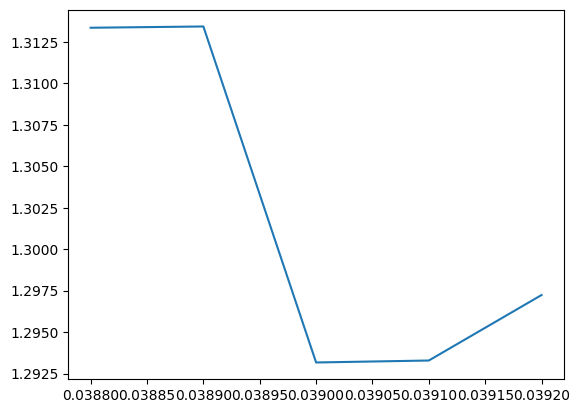

In [34]:
plt.plot(rho01, diff1)

In [ ]:
# Rho0 for 1.6 is 0.03902422

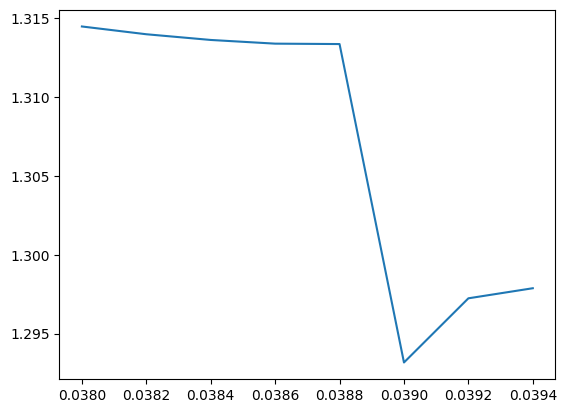

In [32]:
plt.plot(rho01, diff1)

In [ ]:
rho02 = [0.01, 0.02176769, 0.025, 0.03, 0.035, 0.04, 0.045]
# rho02 = np.linspace(0.039, 0.0394, 5)
diff2 = []
for i in rho01:
    rho_ks = io.read_density('rho_1.8.xsf')
    rho_ks *= 32/rho_ks.integral()
    inputfile ='Si_1.8.in'
    material = read(inputfile, format='espresso-in')
    ions = Ions.from_ase(material)
    diff2.append(min_delta_rho(i, rho_ks, ions))

In [ ]:
plt.plot(rho02, diff2)

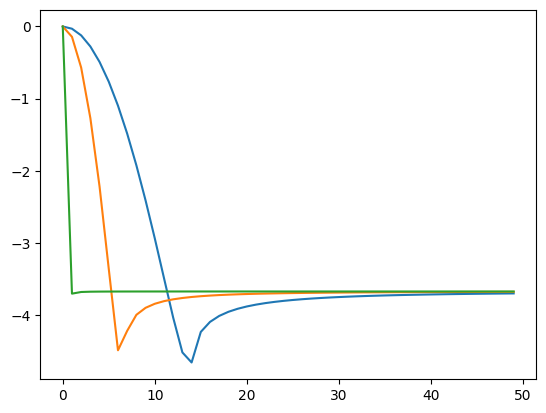

In [27]:
plt.plot(WTKernel(np.linspace(0.0001, 10), rho0=1e-1))
plt.plot(WTKernel(np.linspace(0.0001, 10), rho0=1e-2))
plt.plot(WTKernel(np.linspace(0.0001, 10), rho0=1e-6))

In [22]:
min_delta_rho(1e-6,rho_ks, ions)

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       7.942915E-02    
!WARN: Change to steepest decent
1       -2.892193677968E+00     -9.855201E-01   1.502834E+01    1       4       2.957072E-01    
2       -3.267509082071E+00     -3.753154E-01   1.380237E+00    5       1       5.044312E-01    
3       -3.340814802593E+00     -7.330572E-02   3.661453E-01    14      1       9.905252E-01    
4       -3.342738038245E+00     -1.923236E-03   2.277543E-01    13      1       1.418270E+00    
5       -3.343886892696E+00     -1.148854E-03   1.853638E-01    12      1       1.808603E+00    
6       -3.344832777164E+00     -9.458845E-04   1.683742E-01    16      1       2.323724E+00    
7       -3.345664110242E+00     -8.313331E-04   1.496741E-01    13      1       2.744161E+00    
8       -3.3464211

0.49919017026065615

In [13]:
rho0 = [0.01, 0.02176769, 0.025, 0.03, 0.035, 0.04, 0.045]
diff = []
for i in rho0:
    diff.append(min_delta_rho(i, rho_ks, ions))

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       2.002351E-01    
!WARN: Change to steepest decent
1       -3.184709879701E+00     -1.278036E+00   2.140814E+01    1       4       6.847441E-01    
2       -3.734588376627E+00     -5.498785E-01   1.998241E+00    5       1       1.041863E+00    
3       -3.743438962097E+00     -8.850585E-03   8.460049E-01    13      1       2.032023E+00    
4       -3.748398658255E+00     -4.959696E-03   8.872562E-01    12      1       2.761783E+00    
5       -4.025207432906E+00     -2.768088E-01   3.474995E-01    21      5       4.348647E+00    
6       -4.047815491583E+00     -2.260806E-02   1.261596E-01    12      1       5.012069E+00    
7       -4.053836145687E+00     -6.020654E-03   3.222533E-02    15      1       5.955152E+00    
8       -4.0583386

6       -3.734277282164E+00     -1.215947E-04   1.695331E-02    12      1       3.548665E+00    
7       -3.734370922179E+00     -9.364001E-05   1.718551E-02    12      1       4.183228E+00    
8       -3.734451685541E+00     -8.076336E-05   1.324051E-02    12      1       4.824643E+00    
9       -3.734524253151E+00     -7.256761E-05   1.361426E-02    14      1       5.553088E+00    
10      -3.743538115227E+00     -9.013862E-03   7.839514E-03    38      5       7.650626E+00    
11      -3.744345381234E+00     -8.072660E-04   2.619022E-03    14      1       8.391023E+00    
12      -3.744451392350E+00     -1.060111E-04   3.784397E-04    14      1       9.140735E+00    
13      -3.744453147878E+00     -1.755527E-06   1.998787E-04    12      1       9.784099E+00    
14      -3.744517669357E+00     -6.452148E-05   1.652054E-04    23      5       1.116677E+01    
15      -3.744526952999E+00     -9.283642E-06   4.475983E-05    15      1       1.195988E+01    
16      -3.744529459530E+00   

Chemical potential (eV)  : -3.69569817952256
Results:  0.03 0.16828016653642394
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       1.015310E-01    
!WARN: Change to steepest decent
1       -3.033762179020E+00     -1.127089E+00   1.867352E+01    1       4       3.652651E-01    
2       -3.486938444965E+00     -4.531763E-01   1.566148E+00    5       1       6.566451E-01    
3       -3.493640772220E+00     -6.702327E-03   6.292167E-01    15      1       1.440416E+00    
4       -3.497406311102E+00     -3.765539E-03   6.803598E-01    14      1       2.177308E+00    
5       -3.500409612631E+00     -3.003302E-03   4.394455E-01    18      1       3.114207E+00    
6       -3.660150707093E+00     -1.597411E-01   3.086192E-01    18      6       4.287397E+00    
7       -3.667828271224E+00     -7.

Text(0, 0.5, '$\\Delta n(\\vec{r})$')

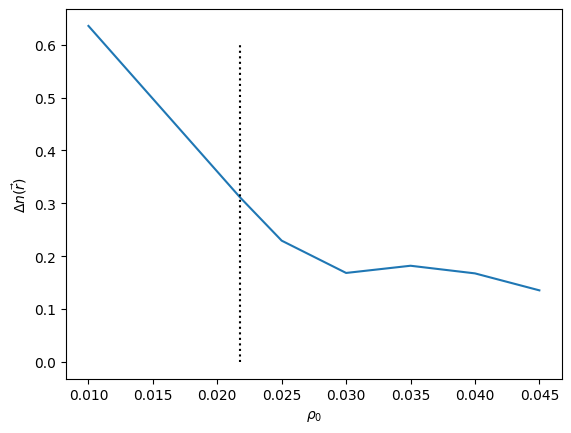

In [19]:
plt.plot(rho0, diff)
plt.vlines(x=0.02176769,ymin=0,ymax=0.6,ls='dotted',colors='k')
plt.xlabel(r'$\rho_0$')
plt.ylabel(r'$\Delta n(\vec{r})$')

In [10]:
minn = minimize(min_delta_rho, 0.01, args = (rho_ks, ions), method='Powell', bounds=[[0,1]], options={'ftol' : 1e-3})

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       9.068608E-02    
!WARN: Change to steepest decent
1       -3.184709879701E+00     -1.278036E+00   2.140814E+01    1       4       3.303421E-01    
2       -3.734588376627E+00     -5.498785E-01   1.998241E+00    5       1       5.986400E-01    
3       -3.743438962097E+00     -8.850585E-03   8.460049E-01    13      1       1.243455E+00    
4       -3.748398658255E+00     -4.959696E-03   8.872562E-01    12      1       1.820670E+00    
5       -4.025207432906E+00     -2.768088E-01   3.474995E-01    21      5       2.966869E+00    
6       -4.047815491583E+00     -2.260806E-02   1.261596E-01    12      1       3.533269E+00    
7       -4.053836145687E+00     -6.020654E-03   3.222533E-02    15      1       4.247854E+00    
8       -4.0583386

10      -3.427238144465E+00     -6.417659E-04   1.242805E-01    23      1       6.701041E+00    
11      -3.427847939890E+00     -6.097954E-04   1.154796E-01    15      1       7.422850E+00    
12      -3.428433004867E+00     -5.850650E-04   1.151041E-01    15      1       8.144660E+00    
13      -3.428997663155E+00     -5.646583E-04   1.080980E-01    12      1       8.729080E+00    
14      -3.429545041439E+00     -5.473783E-04   1.085495E-01    12      1       9.358137E+00    
15      -3.430077474808E+00     -5.324334E-04   1.027092E-01    19      1       1.026907E+01    
16      -3.430596741553E+00     -5.192667E-04   1.030352E-01    19      1       1.114236E+01    
17      -3.431104195319E+00     -5.074538E-04   9.889110E-02    20      1       1.205109E+01    
18      -3.431601012360E+00     -4.968170E-04   9.901129E-02    20      1       1.295988E+01    
19      -3.432088122988E+00     -4.871106E-04   9.528085E-02    21      1       1.390579E+01    
20      -3.432566283592E+00   

13      -3.544264810179E+00     -1.799983E-04   3.413644E-02    12      1       8.268394E+00    
14      -3.544432580513E+00     -1.677703E-04   3.111923E-02    16      1       9.011708E+00    
15      -3.544590334467E+00     -1.577540E-04   3.040260E-02    17      1       9.821557E+00    
16      -3.544739689303E+00     -1.493548E-04   2.806958E-02    15      1       1.055793E+01    
17      -3.544881883459E+00     -1.421942E-04   2.771361E-02    15      1       1.124591E+01    
18      -3.545017909703E+00     -1.360262E-04   2.582058E-02    18      1       1.209511E+01    
19      -3.545148573619E+00     -1.306639E-04   2.569596E-02    18      1       1.294533E+01    
20      -3.545274554893E+00     -1.259813E-04   2.411138E-02    17      1       1.371740E+01    
21      -3.545396419027E+00     -1.218641E-04   2.414627E-02    12      1       1.430193E+01    
22      -3.545514656492E+00     -1.182375E-04   2.278691E-02    13      1       1.490028E+01    
23      -3.545629678635E+00   

7       -3.670541266356E+00     -7.681750E-03   3.548291E-02    12      1       4.455710E+00    
8       -3.670958589062E+00     -4.173227E-04   2.172583E-02    12      1       5.034861E+00    
9       -3.671079534368E+00     -1.209453E-04   1.361254E-02    14      1       5.792495E+00    
10      -3.677477616401E+00     -6.398082E-03   9.555756E-03    20      5       7.113748E+00    
11      -3.679111632191E+00     -1.634016E-03   4.570129E-03    18      1       8.147844E+00    
12      -3.679426952339E+00     -3.153201E-04   1.753413E-03    17      1       9.244782E+00    
13      -3.679435426358E+00     -8.474019E-06   1.051966E-03    14      1       1.020679E+01    
14      -3.679440899435E+00     -5.473077E-06   9.271789E-04    15      1       1.102865E+01    
15      -3.679445366107E+00     -4.466671E-06   7.498056E-04    14      1       1.179220E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.14289648998704754
Chemical potential (eV)  : -3.88841155

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       1.076622E-01    
!WARN: Change to steepest decent
1       -3.019283789890E+00     -1.112610E+00   1.844611E+01    1       4       4.727330E-01    
2       -3.463389346858E+00     -4.441056E-01   1.522948E+00    5       1       7.993860E-01    
3       -3.469900750162E+00     -6.511403E-03   6.108960E-01    15      1       1.635368E+00    
4       -3.473554725391E+00     -3.653975E-03   6.592449E-01    14      1       2.396455E+00    
5       -3.476464612534E+00     -2.909887E-03   4.256943E-01    18      1       3.505323E+00    
6       -3.627836514211E+00     -1.513719E-01   2.972603E-01    18      6       4.760835E+00    
7       -3.635565142515E+00     -7.728628E-03   3.828177E-02    12      1       5.460416E+00    
8       -3.636006986977E+00     -4.418445E-04   2.276297E-02    12      1       6.183269E+00  

0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       9.859490E-02    
!WARN: Change to steepest decent
1       -3.011951756960E+00     -1.105278E+00   1.833410E+01    1       4       3.749800E-01    
2       -3.451505792874E+00     -4.395540E-01   1.500895E+00    5       1       6.780350E-01    
3       -3.457921226576E+00     -6.415434E-03   6.017944E-01    15      1       1.505944E+00    
4       -3.461518838865E+00     -3.597612E-03   6.484217E-01    14      1       2.306592E+00    
5       -3.464381565134E+00     -2.862726E-03   4.188939E-01    18      1       3.274088E+00    
6       -3.611832351954E+00     -1.474508E-01   2.913334E-01    18      6       4.500304E+00    
7       -3.619583778175E+00     -7.751426E-03   3.950057E-02    12      1       5.186444E+00    
8       -3.620035099444E+00     -4.513213E-04   2.317566E-02    12      1       5.858281E+00    
9       -3.626773261088E+00     -6.738162E-03   7.409992E-03    20      4       7.165727E+00  

11      -3.639080047061E+00     -1.822347E-03   4.544836E-03    17      1       7.479666E+00    
12      -3.639389581570E+00     -3.095345E-04   1.854238E-03    15      1       8.163136E+00    
13      -3.639990093627E+00     -6.005121E-04   2.912738E-04    37      2       9.872097E+00    
14      -3.640006425850E+00     -1.633222E-05   8.486049E-05    12      1       1.043091E+01    
15      -3.640014195508E+00     -7.769658E-06   1.498805E-05    19      2       1.137794E+01    
16      -3.640014972033E+00     -7.765255E-07   3.640589E-06    12      1       1.195285E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13559387266496328
Chemical potential (eV)  : -3.6896972116252136
Results:  [0.04499998] 0.13536607960395844
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1 

23      -3.480676102673E+00     -1.123806E-03   1.191839E-02    14      1       1.979839E+01    
24      -3.481133046315E+00     -4.569436E-04   5.908613E-03    12      1       2.051438E+01    
25      -3.482748689501E+00     -1.615643E-03   3.154673E-03    15      4       2.153327E+01    
26      -3.483228745004E+00     -4.800555E-04   1.674567E-03    19      1       2.258488E+01    
27      -3.483427562939E+00     -1.988179E-04   5.274082E-04    20      1       2.366690E+01    
28      -3.483431057341E+00     -3.494402E-06   4.538498E-04    12      1       2.434139E+01    
29      -3.483433256960E+00     -2.199619E-06   2.857203E-04    15      1       2.528181E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1359539662385747
Chemical potential (eV)  : -3.6994958568616476
Results:  [0.38196601] 0.3850329830137589
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd  

7       -3.483544093186E+00     -6.677442E-04   1.181197E-01    12      1       4.992887E+00    
8       -3.484125056717E+00     -5.809635E-04   1.025394E-01    13      1       5.701944E+00    
9       -3.484646207820E+00     -5.211511E-04   9.711710E-02    17      1       6.628463E+00    
10      -3.485122892432E+00     -4.766846E-04   8.704495E-02    17      1       7.534639E+00    
11      -3.485564727587E+00     -4.418352E-04   8.432933E-02    15      1       8.386164E+00    
12      -3.485978275931E+00     -4.135483E-04   7.688361E-02    15      1       9.195968E+00    
13      -3.486368218105E+00     -3.899422E-04   7.548048E-02    13      1       9.918894E+00    
14      -3.486738084736E+00     -3.698666E-04   6.956410E-02    13      1       1.064329E+01    
15      -3.487090603783E+00     -3.525190E-04   6.891074E-02    24      1       1.193980E+01    
16      -3.487427980248E+00     -3.373765E-04   6.400289E-02    18      1       1.291586E+01    
17      -3.487752002943E+00   

12      -3.612025958930E+00     -2.215298E-05   4.321284E-03    24      1       8.428113E+00    
13      -3.612045842317E+00     -1.988339E-05   3.213913E-03    18      1       9.244062E+00    
14      -3.612064136106E+00     -1.829379E-05   3.325027E-03    22      1       1.022831E+01    
15      -3.612081270045E+00     -1.713394E-05   3.288368E-03    17      1       1.100665E+01    
16      -3.612097616378E+00     -1.634633E-05   3.059818E-03    17      1       1.178583E+01    
17      -3.612113323756E+00     -1.570738E-05   3.060516E-03    25      1       1.290098E+01    
18      -3.612128499169E+00     -1.517541E-05   2.872598E-03    24      1       1.397041E+01    
19      -3.612143218015E+00     -1.471885E-05   2.885449E-03    20      1       1.486460E+01    
20      -3.612157537799E+00     -1.431978E-05   2.734708E-03    15      1       1.556029E+01    
21      -3.612171503692E+00     -1.396589E-05   2.742315E-03    16      1       1.629430E+01    
22      -3.612185150407E+00   

23      -3.728251843180E+00     -1.007569E-05   2.010272E-03    12      1       1.535672E+01    
24      -3.728261857219E+00     -1.001404E-05   1.988711E-03    12      1       1.591219E+01    
25      -3.728271814211E+00     -9.956992E-06   1.989273E-03    12      1       1.649837E+01    
26      -3.728281717792E+00     -9.903581E-06   1.969169E-03    12      1       1.706927E+01    
27      -3.728291570855E+00     -9.853063E-06   1.970717E-03    12      1       1.763513E+01    
28      -3.728301375854E+00     -9.804999E-06   1.951624E-03    14      1       1.829257E+01    
29      -3.728311134793E+00     -9.758939E-06   1.953215E-03    14      1       1.893757E+01    
30      -3.728320849431E+00     -9.714638E-06   1.936102E-03    14      1       1.958427E+01    
31      -3.728330521261E+00     -9.671830E-06   1.937555E-03    14      1       2.023004E+01    
32      -3.728340151634E+00     -9.630373E-06   1.921009E-03    14      1       2.087206E+01    
33      -3.728349741689E+00   

14      -3.641455510930E+00     -1.627893E-05   8.527309E-05    12      1       1.056699E+01    
15      -3.641463277013E+00     -7.766083E-06   1.497956E-05    19      2       1.149106E+01    
16      -3.641464053326E+00     -7.763129E-07   3.645464E-06    12      1       1.205141E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1356220949809774
Chemical potential (eV)  : -3.6904651799607757
Results:  [0.04451334] 0.13540531599922206
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.933592E-02    
!WARN: Change to steepest decent
1       -3.017740882380E+00     -1.111067E+00   1.842007E+01    1       4       3.259220E-01    
2       -3.460818352864E+00     -4.430775E-01   1.518427E+00    5       1       5.943749E-01    
3       -3.467310101039E+00     -6

36      -3.627193283900E+00     -1.072730E-05   2.094812E-03    21      1       2.839035E+01    
37      -3.627203877871E+00     -1.059397E-05   2.095230E-03    13      1       2.899161E+01    
38      -3.627214342709E+00     -1.046484E-05   2.045310E-03    13      1       2.959494E+01    
39      -3.627224682408E+00     -1.033970E-05   2.045639E-03    13      1       3.021070E+01    
40      -3.627234900599E+00     -1.021819E-05   1.997921E-03    16      1       3.093730E+01    
41      -3.627245000686E+00     -1.010009E-05   1.998185E-03    15      1       3.162246E+01    
42      -3.628136210973E+00     -8.912103E-04   1.720907E-03    15      6       3.253029E+01    
43      -3.628301917279E+00     -1.657063E-04   8.249483E-04    13      1       3.313265E+01    
44      -3.628363060205E+00     -6.114293E-05   7.596364E-04    16      1       3.385802E+01    
45      -3.628410305523E+00     -4.724532E-05   1.046788E-03    19      1       3.471590E+01    
46      -3.628445369040E+00   

26      -3.633401572431E+00     -1.229310E-05   2.385090E-03    13      1       1.945023E+01    
27      -3.633413657948E+00     -1.208552E-05   2.386795E-03    17      1       2.021089E+01    
28      -3.633425548001E+00     -1.189005E-05   2.310804E-03    16      1       2.093220E+01    
29      -3.633437253321E+00     -1.170532E-05   2.312015E-03    17      1       2.170949E+01    
30      -3.633448783110E+00     -1.152979E-05   2.245400E-03    17      1       2.248451E+01    
31      -3.633460145896E+00     -1.136279E-05   2.246283E-03    12      1       2.304341E+01    
32      -3.633471349102E+00     -1.120321E-05   2.183646E-03    23      1       2.408810E+01    
33      -3.633482399431E+00     -1.105033E-05   2.184305E-03    19      1       2.500175E+01    
34      -3.633493302795E+00     -1.090336E-05   2.128244E-03    21      1       2.603308E+01    
35      -3.633504064807E+00     -1.076201E-05   2.128539E-03    21      1       2.706314E+01    
36      -3.633514690458E+00   

Chemical potential (eV)  : -3.689599677741716
Results:  [0.04506517] 0.13536620780939132
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       9.377003E-02    
!WARN: Change to steepest decent
1       -3.016807396840E+00     -1.110134E+00   1.840107E+01    1       4       3.232760E-01    
2       -3.459159447570E+00     -4.423521E-01   1.515776E+00    5       1       5.867491E-01    
3       -3.465639853256E+00     -6.480406E-03   6.080684E-01    15      1       1.299224E+00    
4       -3.469276333498E+00     -3.636480E-03   6.559242E-01    14      1       1.962615E+00    
5       -3.472171835019E+00     -2.895502E-03   4.236535E-01    18      1       2.784596E+00    
6       -3.622447036551E+00     -1.502752E-01   2.953276E-01    18      6       3.816310E+00    
7       -3.630191274468E+0

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.746600E-02    
!WARN: Change to steepest decent
1       -3.016772033347E+00     -1.110098E+00   1.839895E+01    1       4       3.095570E-01    
2       -3.459052409921E+00     -4.422804E-01   1.515715E+00    5       1       5.742180E-01    
3       -3.465532625684E+00     -6.480216E-03   6.080780E-01    15      1       1.258027E+00    
4       -3.469169149651E+00     -3.636524E-03   6.559380E-01    14      1       1.890380E+00    
5       -3.472064744290E+00     -2.895595E-03   4.236773E-01    18      1       2.706767E+00    
6       -3.622378238022E+00     -1.503135E-01   2.953051E-01    18      6       3.730480E+00    
7       -3.630124161647E+00     -7.745924E-03   3.881254E-02    12      1       4.286092E+00    
8       -3.630570390567E+00     -4.462289E-04   2.296417E-02    12      1       4.837957E+00  

7       -3.425178042649E+00     -8.143950E-04   1.409745E-01    13      1       5.517019E+00    
8       -3.425914317707E+00     -7.362751E-04   1.430961E-01    15      1       6.342160E+00    
9       -3.426596378553E+00     -6.820608E-04   1.229166E-01    13      1       7.069194E+00    
10      -3.427238144465E+00     -6.417659E-04   1.242805E-01    23      1       8.520942E+00    
11      -3.427847939890E+00     -6.097954E-04   1.154796E-01    15      1       9.356870E+00    
12      -3.428433004867E+00     -5.850650E-04   1.151041E-01    15      1       1.019732E+01    
13      -3.428997663155E+00     -5.646583E-04   1.080980E-01    12      1       1.085479E+01    
14      -3.429545041439E+00     -5.473783E-04   1.085495E-01    12      1       1.151163E+01    
15      -3.430077474808E+00     -5.324334E-04   1.027092E-01    19      1       1.253900E+01    
16      -3.430596741553E+00     -5.192667E-04   1.030352E-01    19      1       1.355598E+01    
17      -3.431104195319E+00   

10      -3.543673391273E+00     -2.455506E-04   4.264347E-02    13      1       7.084585E+00    
11      -3.543889369074E+00     -2.159778E-04   3.978105E-02    19      1       8.063900E+00    
12      -3.544084811905E+00     -1.954428E-04   3.550347E-02    20      1       9.113342E+00    
13      -3.544264810179E+00     -1.799983E-04   3.413644E-02    12      1       9.771604E+00    
14      -3.544432580513E+00     -1.677703E-04   3.111923E-02    16      1       1.067146E+01    
15      -3.544590334467E+00     -1.577540E-04   3.040260E-02    17      1       1.156309E+01    
16      -3.544739689303E+00     -1.493548E-04   2.806958E-02    15      1       1.240386E+01    
17      -3.544881883459E+00     -1.421942E-04   2.771361E-02    15      1       1.323230E+01    
18      -3.545017909703E+00     -1.360262E-04   2.582058E-02    18      1       1.417788E+01    
19      -3.545148573619E+00     -1.306639E-04   2.569596E-02    18      1       1.514201E+01    
20      -3.545274554893E+00   

4       -3.499045431201E+00     -3.776417E-03   6.824559E-01    14      1       2.009386E+00    
5       -3.502058180626E+00     -3.012749E-03   4.408928E-01    18      1       2.818026E+00    
6       -3.662859516639E+00     -1.608013E-01   3.096013E-01    18      6       3.882260E+00    
7       -3.670541266356E+00     -7.681750E-03   3.548291E-02    12      1       4.457146E+00    
8       -3.670958589062E+00     -4.173227E-04   2.172583E-02    12      1       5.007088E+00    
9       -3.671079534368E+00     -1.209453E-04   1.361254E-02    14      1       5.679881E+00    
10      -3.677477616401E+00     -6.398082E-03   9.555756E-03    20      5       6.743119E+00    
11      -3.679111632191E+00     -1.634016E-03   4.570129E-03    18      1       7.557410E+00    
12      -3.679426952339E+00     -3.153201E-04   1.753413E-03    17      1       8.327017E+00    
13      -3.679435426358E+00     -8.474019E-06   1.051966E-03    14      1       8.973419E+00    
14      -3.679440899435E+00   

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13634537498209245
Chemical potential (eV)  : -3.7101466312748217
Results:  [0.02639899] 0.2154282191654169
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.656693E-02    
!WARN: Change to steepest decent
1       -3.019312402537E+00     -1.112639E+00   1.844788E+01    1       4       3.131118E-01    
2       -3.463477125668E+00     -4.441647E-01   1.522996E+00    5       1       5.739410E-01    
3       -3.469988680671E+00     -6.511555E-03   6.108878E-01    15      1       1.256905E+00    
4       -3.473642614626E+00     -3.653934E-03   6.592319E-01    14      1       1.894361E+00    
5       -3.476552420108E+00     -2.909805E-03   4.256745E-01    18      1       2.708349E+00    
6       -3.627892496095E+00     -1

Chemical potential (eV)  : -3.690060663699616
Results:  [0.04477148] 0.1353752012888125
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.644199E-02    
!WARN: Change to steepest decent
1       -3.011950604092E+00     -1.105277E+00   1.833404E+01    1       4       3.131320E-01    
2       -3.451502433576E+00     -4.395518E-01   1.500893E+00    5       1       5.742919E-01    
3       -3.457917860308E+00     -6.415427E-03   6.017946E-01    15      1       1.250947E+00    
4       -3.461515473005E+00     -3.597613E-03   6.484219E-01    14      1       1.891379E+00    
5       -3.464378201283E+00     -2.862728E-03   4.188945E-01    18      1       2.695700E+00    
6       -3.611830102008E+00     -1.474519E-01   2.913321E-01    18      6       3.721773E+00    
7       -3.619581578732E+00

8       -3.630696446546E+00     -4.457878E-04   2.294098E-02    12      1       4.910539E+00    
9       -3.630823341404E+00     -1.268949E-04   1.425904E-02    14      1       5.555682E+00    
10      -3.637218653237E+00     -6.395312E-03   1.067961E-02    19      5       6.583064E+00    
11      -3.639039585182E+00     -1.820932E-03   4.540371E-03    17      1       7.355556E+00    
12      -3.639348886415E+00     -3.093012E-04   1.852275E-03    15      1       8.057721E+00    
13      -3.639948857194E+00     -5.999708E-04   2.918999E-04    37      2       9.757622E+00    
14      -3.639965172828E+00     -1.631563E-05   8.491188E-05    12      1       1.032266E+01    
15      -3.639972939227E+00     -7.766399E-06   1.497640E-05    19      2       1.121575E+01    
16      -3.639973715239E+00     -7.760116E-07   3.637807E-06    12      1       1.177423E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1355932312450929
Chemical potential (eV)  : -3.689679757

9       -3.630696952597E+00     -1.269237E-04   1.426197E-02    14      1       5.491808E+00    
10      -3.637092716064E+00     -6.395763E-03   1.068314E-02    19      5       6.536390E+00    
11      -3.638914319949E+00     -1.821604E-03   4.540640E-03    17      1       7.331531E+00    
12      -3.639223640702E+00     -3.093208E-04   1.852908E-03    15      1       8.028283E+00    
13      -3.639823688836E+00     -6.000481E-04   2.885663E-04    37      2       9.715666E+00    
14      -3.639840007909E+00     -1.631907E-05   8.474205E-05    12      1       1.027279E+01    
15      -3.639847766080E+00     -7.758171E-06   1.498023E-05    19      2       1.123962E+01    
16      -3.639848542711E+00     -7.766313E-07   3.655574E-06    12      1       1.189204E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.135590621461573
Chemical potential (eV)  : -3.6896087418747165
Results:  [0.04505655] 0.13536680931464606
setting key: Si -> /Users/valeria/Documents/PP/

10      -3.637114287855E+00     -6.398299E-03   1.068414E-02    19      5       7.234515E+00    
11      -3.638936654637E+00     -1.822367E-03   4.543060E-03    17      1       8.067452E+00    
12      -3.639246102311E+00     -3.094477E-04   1.853978E-03    15      1       8.831110E+00    
13      -3.639846432848E+00     -6.003305E-04   2.931557E-04    37      2       1.051967E+01    
14      -3.639862763422E+00     -1.633057E-05   8.488126E-05    12      1       1.108806E+01    
15      -3.639870534465E+00     -7.771043E-06   1.498122E-05    19      2       1.199149E+01    
16      -3.639871310604E+00     -7.761396E-07   3.632686E-06    12      1       1.255110E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1355911948677449
Chemical potential (eV)  : -3.689624345051409
Results:  [0.0450488] 0.13536586168101092
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd   

11      -3.638937027976E+00     -1.822364E-03   4.543048E-03    17      1       7.479991E+00    
12      -3.639246474970E+00     -3.094470E-04   1.853966E-03    15      1       8.210755E+00    
13      -3.639846808413E+00     -6.003334E-04   2.911014E-04    37      2       9.962496E+00    
14      -3.639863136621E+00     -1.632821E-05   8.482818E-05    12      1       1.057063E+01    
15      -3.639870904491E+00     -7.767870E-06   1.498515E-05    19      2       1.151088E+01    
16      -3.639871680874E+00     -7.763828E-07   3.641615E-06    12      1       1.209033E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1355911450173889
Chemical potential (eV)  : -3.6896229885541283
Results:  [0.04504868] 0.1353660889415411
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1   

12      -3.639246157441E+00     -3.094472E-04   1.853968E-03    15      1       7.992226E+00    
13      -3.639846486857E+00     -6.003294E-04   2.931762E-04    37      2       9.675258E+00    
14      -3.639862817446E+00     -1.633059E-05   8.487730E-05    12      1       1.024009E+01    
15      -3.639870588510E+00     -7.771064E-06   1.498200E-05    19      2       1.112892E+01    
16      -3.639871364661E+00     -7.761515E-07   3.632951E-06    12      1       1.167322E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13559119470773867
Chemical potential (eV)  : -3.6896243406974176
Results:  [0.04504878] 0.13536586943886264
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.561516E-02    
!WARN: Change to steepest decent
1       -3.016781866655E+00     -

In [11]:
minn.x, minn.fun

(array([0.0450488]), 0.13536586168101092)

In [ ]:
0.02176769

In [6]:
min_delta_rho(0.02176769,rho_ks, ions)

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       1.131930E-01    
!WARN: Change to steepest decent
1       -3.076285866774E+00     -1.169612E+00   1.924537E+01    1       4       4.010980E-01    
2       -3.552416557728E+00     -4.761307E-01   1.697753E+00    5       1       6.856852E-01    
3       -3.758635357161E+00     -2.062188E-01   4.178991E-01    20      2       1.775562E+00    
4       -3.769318117250E+00     -1.068276E-02   3.992369E-02    9       1       2.259367E+00    
5       -3.769549228813E+00     -2.311116E-04   2.535673E-02    13      1       2.914745E+00    
6       -3.769669618340E+00     -1.203895E-04   1.676059E-02    12      1       3.491272E+00    
7       -3.769762111203E+00     -9.249286E-05   1.695336E-02    12      1       4.088709E+00    
8       -3.7698417

0.31123494491292436

Text(0, 0.5, '$ρ_{0}$')

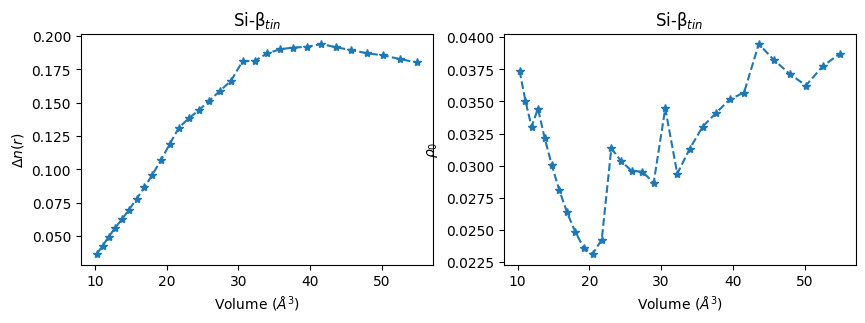

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/8,np.asarray(delta_rho)*1/8,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/8,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta n(r)$')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [14]:
minn.x

array([0.03871501])

In [17]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
l = np.linspace(0.8, 1.4, 30)

for n in np.arange(29,30,1):
    i = int(n)
    rho_ks = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'diamond', a=5.43, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    minn =min_delta_rho(0.0225, rho_ks, ions)
    vol.append(ions.get_volume())


setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.384395628294E+01     -2.384396E+01   5.590656E+00    1       1       1.477449E-01    
!WARN : pAp small than zero :iter =  13 -4983374.936468657
1       -3.017028521099E+01     -6.326329E+00   2.689880E+01    14      2       1.068723E+00    
2       -3.114837721880E+01     -9.780920E-01   1.946672E+00    9       1       1.591368E+00    
3       -3.129805409352E+01     -1.496769E-01   6.442179E-01    14      1       2.362312E+00    
4       -3.134422357734E+01     -4.616948E-02   9.011667E-02    20      1       3.356534E+00    
5       -3.135042300237E+01     -6.199425E-03   1.591857E-02    13      1       4.017739E+00    
6       -3.135188751954E+01     -1.464517E-03   7.791690E-03    13      1       4.694327E+00    
7       -3.135267915679E+01     -7.916372E-04   1.430972E-03    23      1       5.853957E

In [18]:
minn

2.0370925556856294